In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math

# **Амплитудная модуляция**

### **Условия для амплитудной модуляции:**
Зависимость нагрузочного напряжения (несущий сигнал): \\
$u=U_0coswt$, где $U_0 -$несущая \\

Зависимость полезного напряжения (модулируемый сигнал): \\
$v=mU_0cos \Omega t$

In [3]:
U_0 = math.sqrt(2)
m = 0.5
w = 10 ** 5
omega = 5 * 10 ** 3
T = 2 * np.pi / w

In [4]:
def plot_ampspectre(values, arguments):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    for i in range(len(arguments)):
        plt.plot([arguments[i], arguments[i]], [0, values[i]], c="red", linewidth=3.0)
    ax.set(title=f'Спектр амплитудно модулированного сигнала')
    ax.set_xticks(np.linspace(min(arguments) - omega, max(arguments) + omega, 7))
    ax.set_xlabel('Частота, [Гц]')
    ax.set_ylim(0)
    ax.set_yticks(np.linspace(0, 1.05 * max(values), 18))
    ax.set_ylabel('Напряжение, [В]')
    plt.grid()
    plt.show()

In [5]:
def get_ampmodulated(t):
    return U_0 * (1 + m * np.cos(omega * t)) * np.cos(w * t)

def get_contour_upper(t):
    return U_0 * (1 + m * np.cos(omega * t))

def show_ampmodulated(t_max, bypass):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    t = np.linspace(0, t_max, 2000)
    if not bypass:
        ax.scatter(x=t, 
                   y=get_ampmodulated(t),
                   label='Напряжение модулированного сигнала, [В]', 
                   c=abs(get_ampmodulated(t)), cmap=cm.winter)
    else:
        ax.scatter(x=t, y=get_contour_upper(t), c='red', s=1)
        ax.scatter(x=t, y=-get_contour_upper(t), c='red', s=1)
        ax.scatter(x=t, y=get_ampmodulated(t),
                   label='Напряжение модулированного сигнала в ограничении, [В]')
    ax.set(title=f'Картина напряжений сигналов при Амплитудной Модуляции')
    ax.set_ylabel('Напряжение, [В]')
    ax.set_xlabel('Время, [c]')
    ax.legend()
    plt.grid()
    plt.show()

Коэффициент модуляции $m<1$ и частота модулируемого сигнала $\Omega$ много меньшая несущей ($\Omega<<w$) \\
$U_{mod}=U_0coswt+mU_0cos \Omega t \cdot coswt=(U_0+mU_0cos \Omega t) coswt$ \\
$U_{mod}=U_0coswt + \frac{mU_0}{2}cos(\Omega+w)t+\frac{mU_0}{2}cos(w-\Omega)t$ \\

Тогда спектр будет представим тремя значениями по частотам и двумя по амплитудам напряжений:

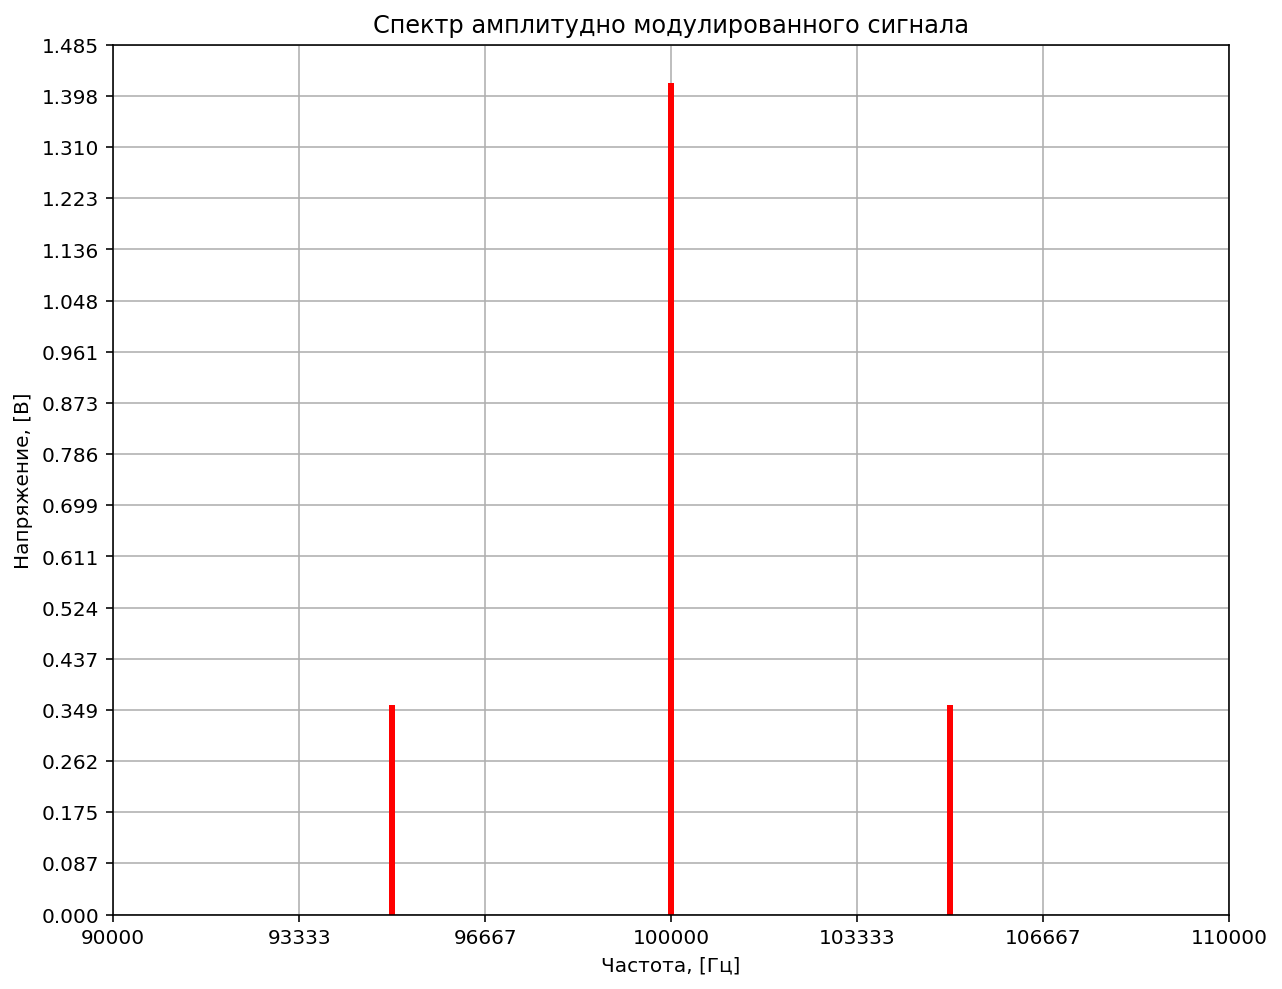

[95000, 100000, 105000]


In [6]:
plot_ampspectre(values=[m * U_0 / 2, U_0, m * U_0 / 2], arguments=[w - omega, w, w + omega])
print([w - omega, w, w + omega])

Заметим, что основной период суммы стал $T_{mod}=\frac{2\pi}{\Omega}$

Построим модулированный сигнал:

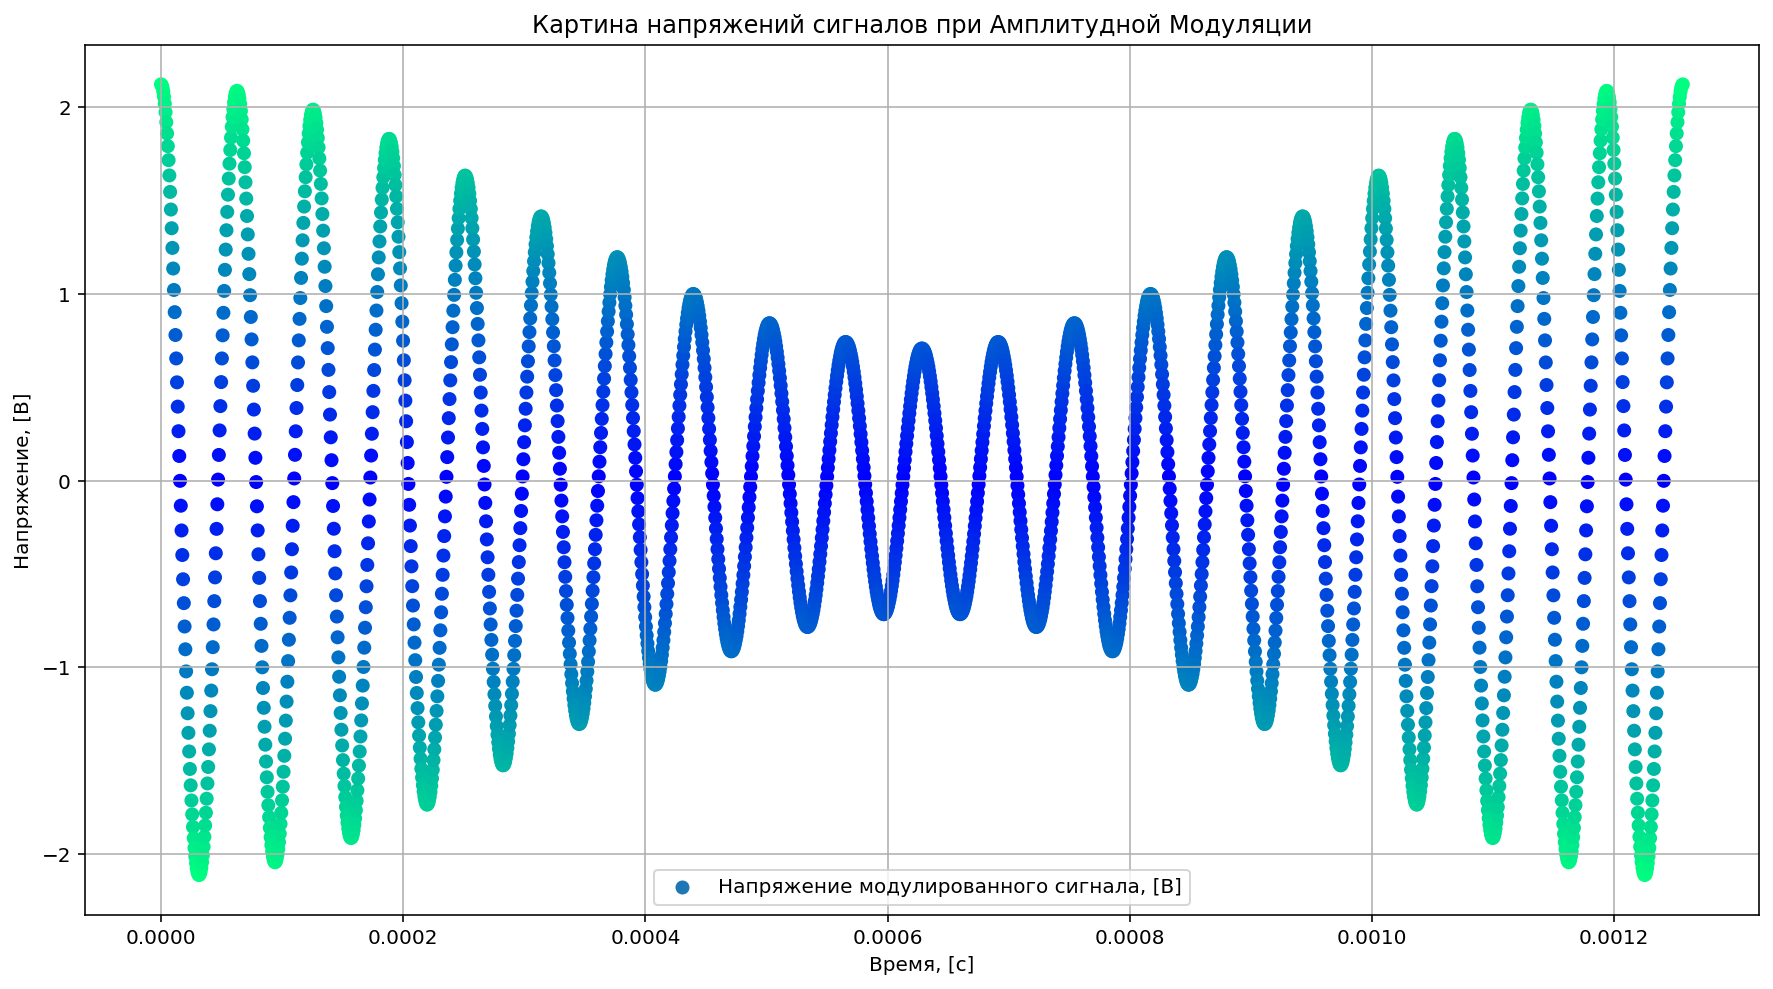

In [7]:
show_ampmodulated(t_max=2 * np.pi / omega, bypass=False)

И удостоверимся, что вложенная гармоника ограничена $U_{amp}=\pm(1+m)U_0cos \Omega t$ на графике:

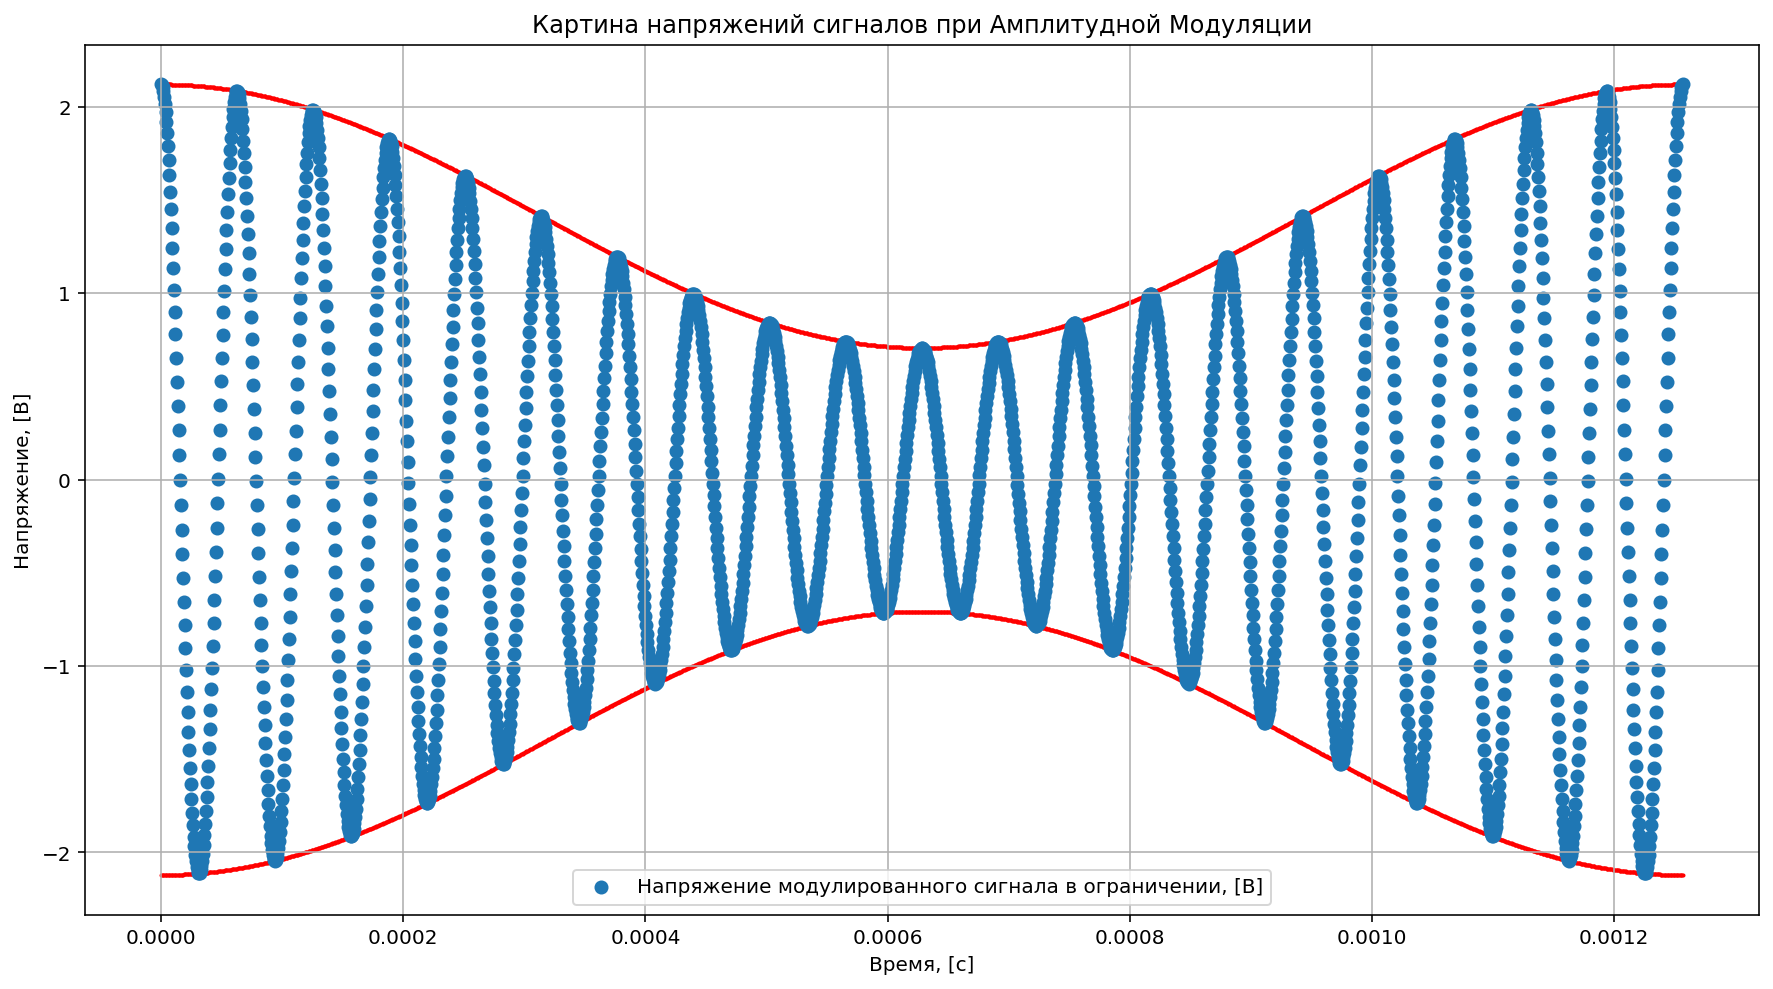

In [8]:
show_ampmodulated(t_max=2 * np.pi / omega, bypass=True)

# **Частотная модуляция**

### **Условия для частотной модуляции:**
Зависимость нагрузочного напряжения (несущий сигнал): \\
$u=U_0coswt$, где $U_0 -$несущая \\

Зависимость полезного напряжения (модулируемый сигнал): \\
$v=U_0cos \Omega t$

In [9]:
U_0_freq = 0.025
deviation = 4 * 10 ** 4
w = 10 ** 5
freq_omega = 2 * 10 ** 3
T = 2 * np.pi / w

Тогда для частотно модулированного сигнала справедливо:

$U_{mod}=U_0cos(wt+\Delta f_m \int cos(\Omega t) dt)$ \\
$U_{mod}=U_0cos(wt+\frac{\Delta f_m}{\Omega} sin(\Omega t))$ \\

In [10]:
def get_freqmodulated(t, dev):
    return U_0_freq * np.cos(2 * np.pi * w * t + dev / freq_omega * np.sin(2 * np.pi * freq_omega * t))

def show_freqmodulated(t_max, dev):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    t = np.linspace(0, t_max, 20000)
    ax.scatter(x=t, 
               y=get_freqmodulated(t, dev),
               s=5,
               c=abs(get_freqmodulated(t, dev)), cmap=cm.winter)
    ax.set(title=f'Картина напряжений сигналов при частотной модуляции c девиацией {dev}')
    ax.set_ylabel('Напряжение, [В]')
    ax.set_xlabel('Время, [c]')
    plt.grid()
    plt.show()

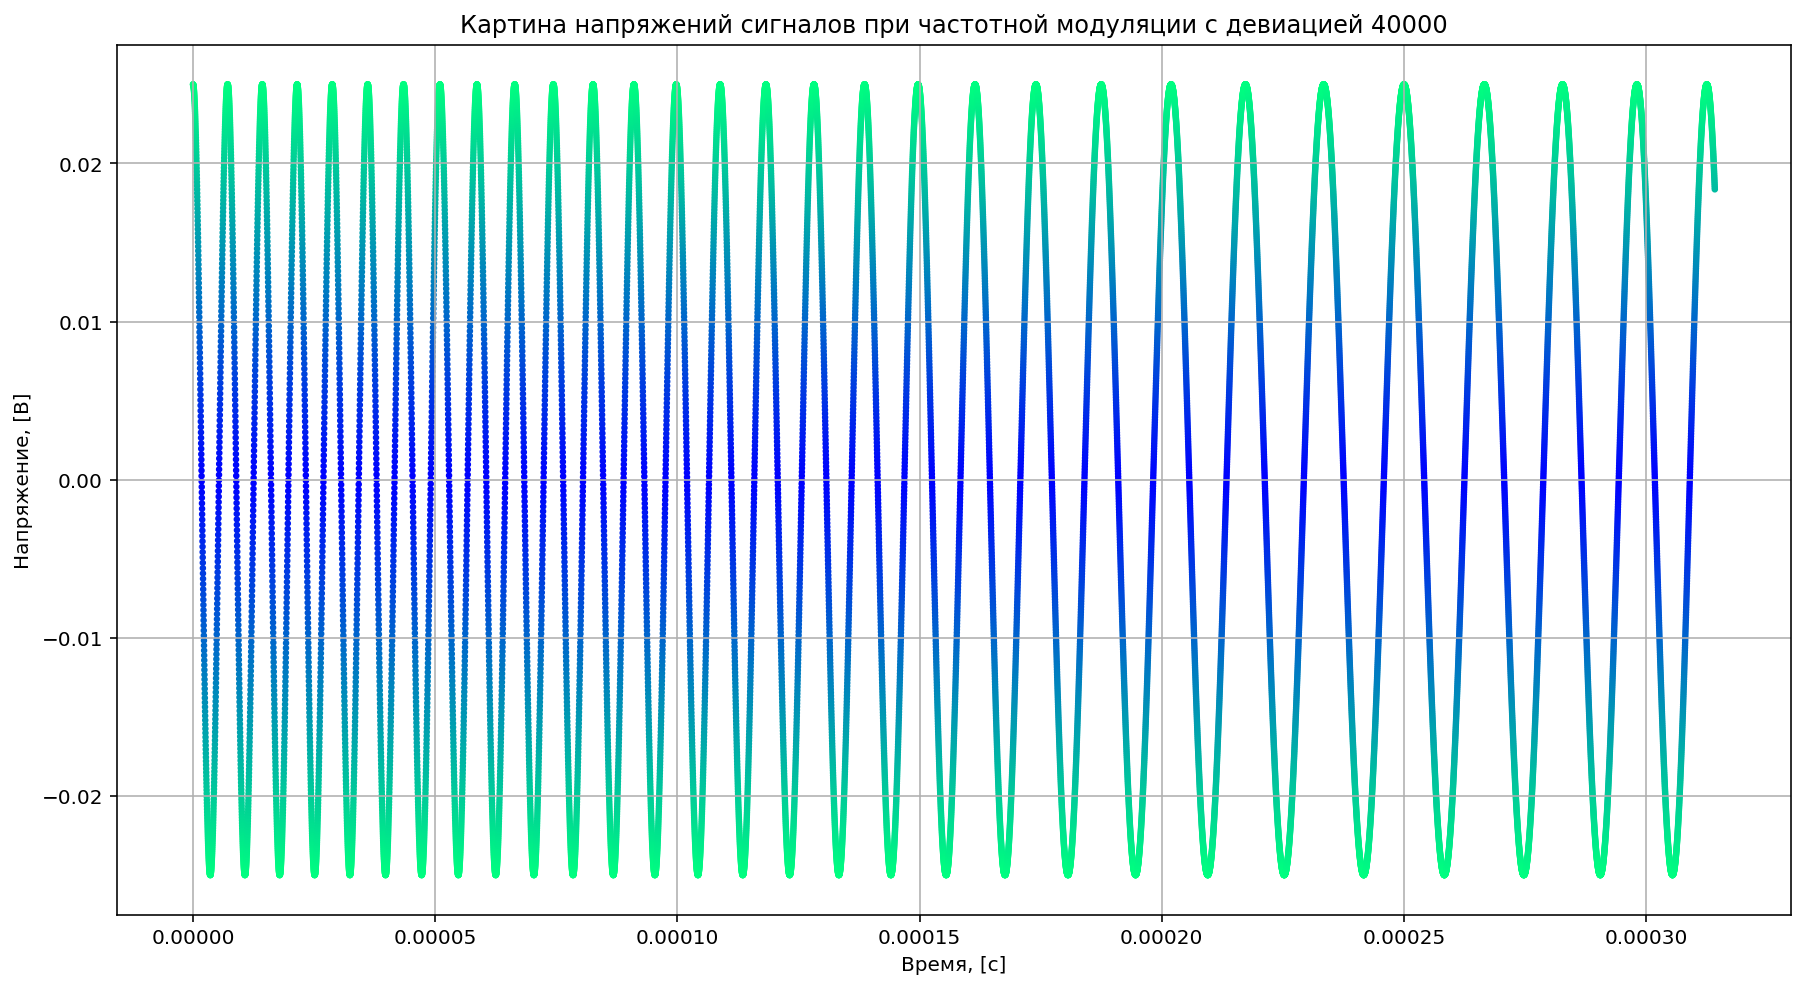

In [11]:
show_freqmodulated(t_max=5*T, dev=deviation)

Заметим, что при увеличении параметра девиации $\Delta f_m$ возрастает спектр частот, то есть формы сигнала в состоянии ***0*** или ***1*** различаются по частоте все больше и больше 

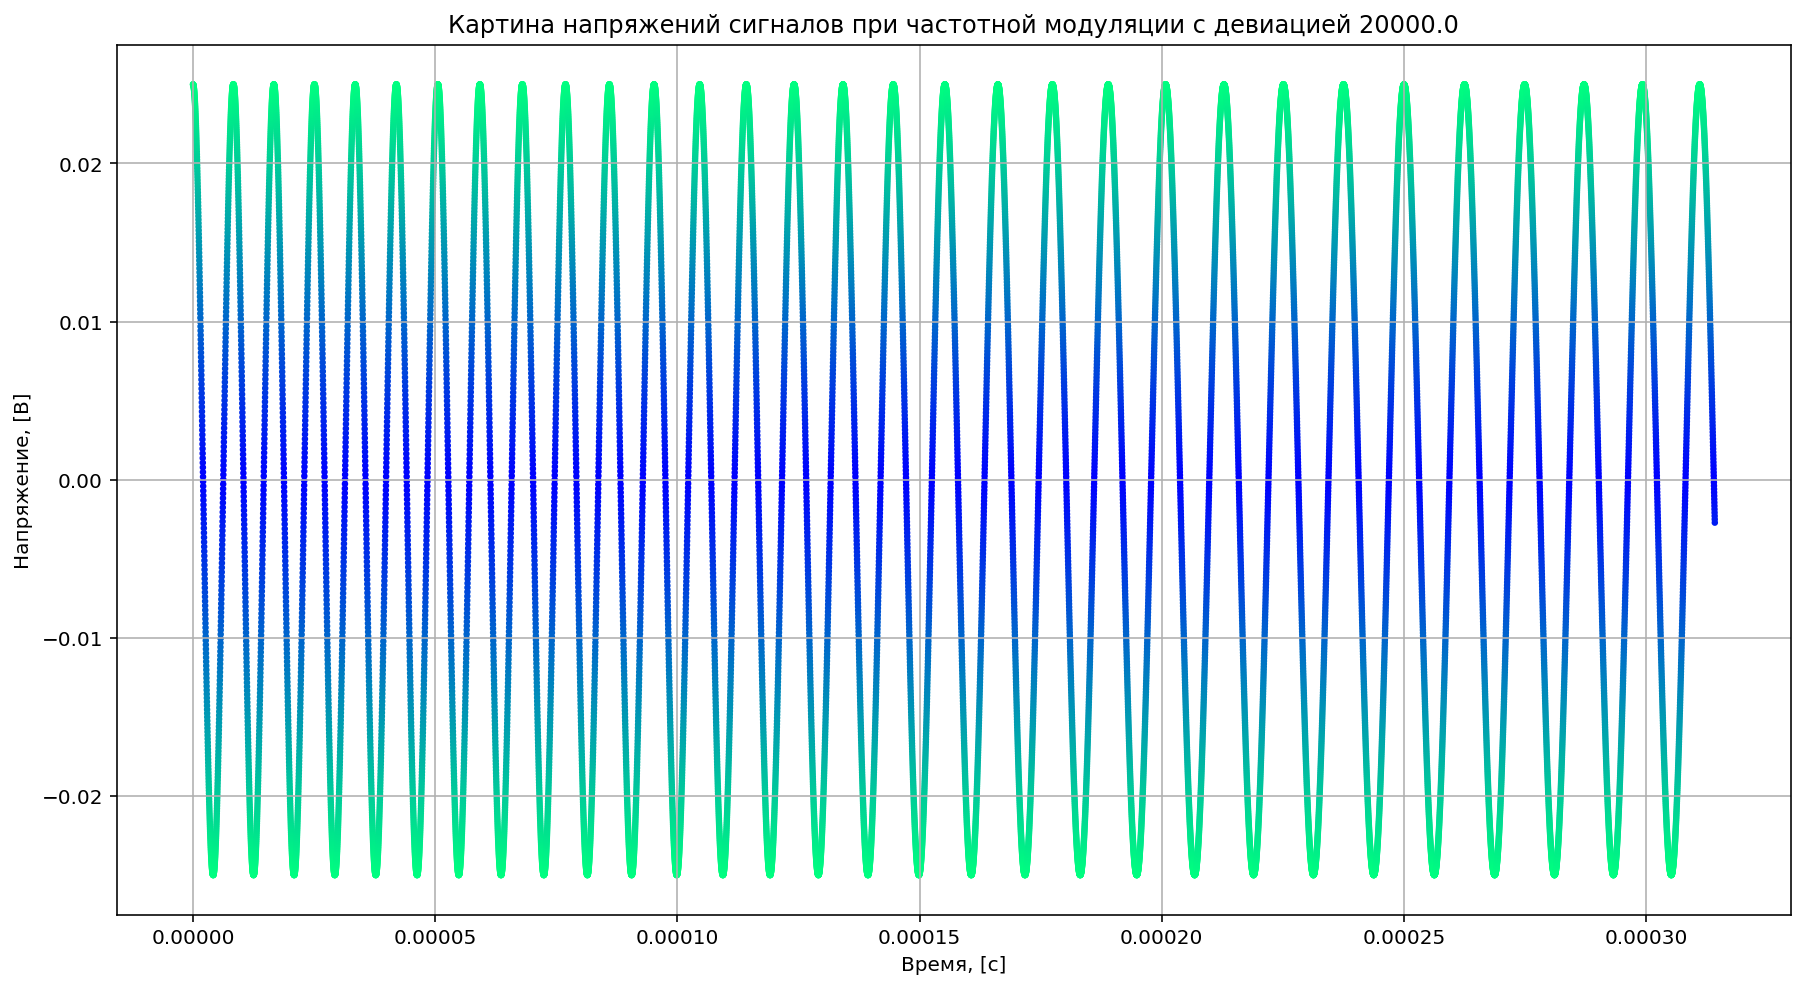

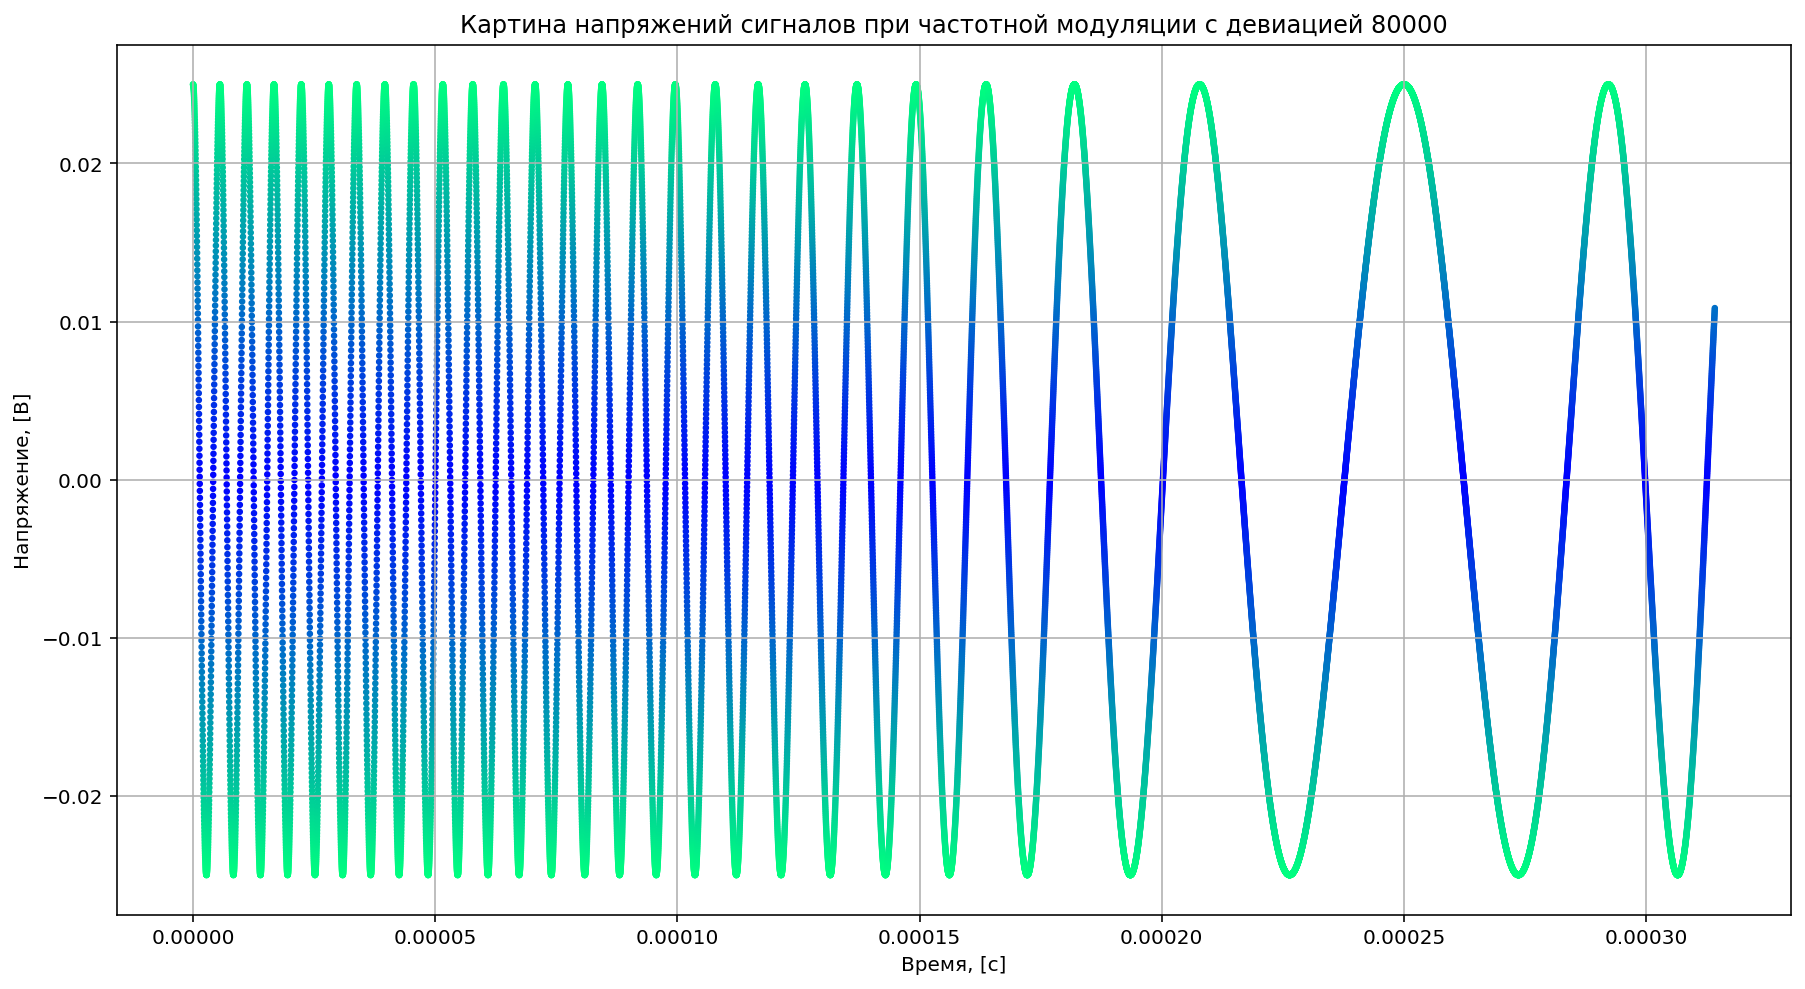

In [12]:
show_freqmodulated(t_max=5*T, dev=deviation/2)
show_freqmodulated(t_max=5*T, dev=deviation*2)

# **Фазовая модуляция**

### **Условия для фазовой модуляции:**
Зависимость нагрузочного напряжения (несущий сигнал): \\
$u=U_0coswt$, где $U_0 -$несущая \\

Зависимость полезного напряжения (модулируемый сигнал): \\
$v=U_0cos \Omega t$

In [13]:
U_0_phase = 1
deviation_phase_coeff = 0.1
phase_omega = 20 * 10 ** 3

Тогда для фазового модулированного сигнала справедливо:

$U_{mod}=U_0cos(wt+\Delta k_{\phi} cos(\Omega t))$

In [14]:
def get_phasemodulated(t, dev):
    return U_0_phase * np.cos(2 * np.pi * w * t + dev * np.cos(2 * np.pi * phase_omega * t))

def show_phasemodulated(t_max, dev):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    t = np.linspace(0, t_max, 20000)
    ax.scatter(x=t, 
               y=get_phasemodulated(t, dev),
               s=5,
               c=abs(get_phasemodulated(t, dev)), cmap=cm.winter)
    ax.set(title=f'Картина напряжений сигналов при фазовой модуляции c максимальным отклонением фазы {dev}')
    ax.set_ylabel('Напряжение, [В]')
    ax.set_xlabel('Время, [c]')
    plt.grid()
    plt.show()

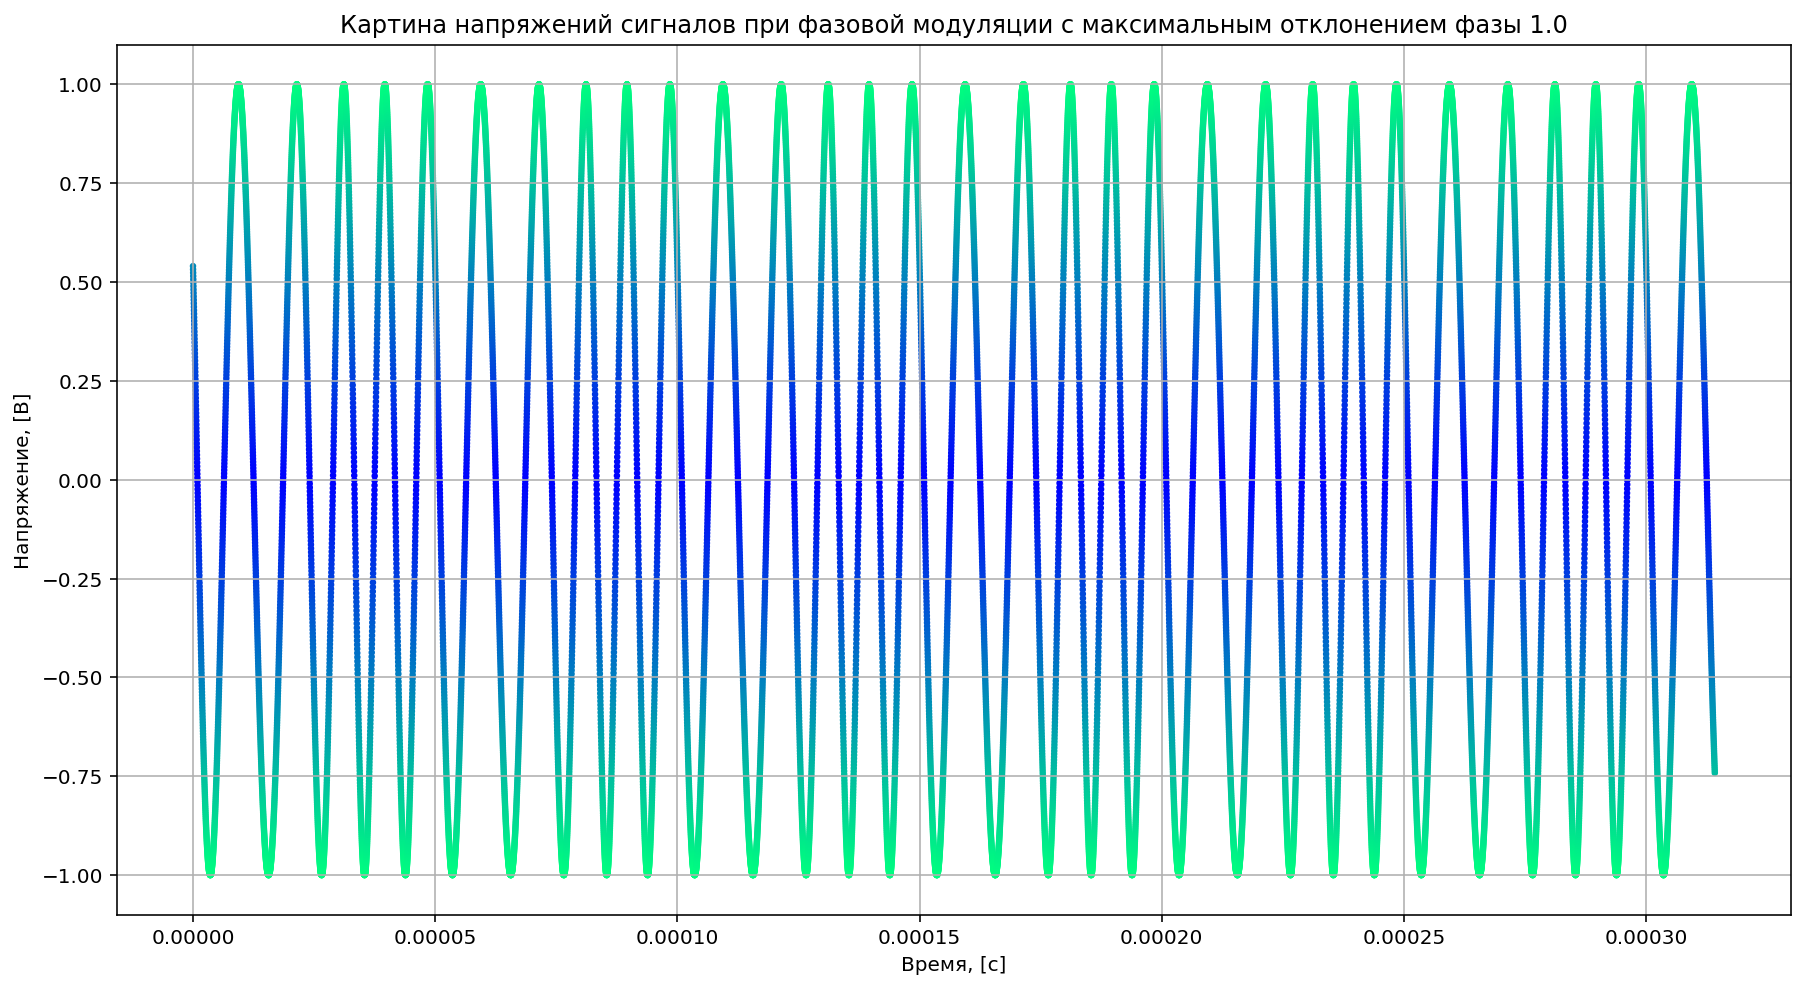

In [15]:
show_phasemodulated(t_max=5*T, dev=deviation_phase_coeff*10)

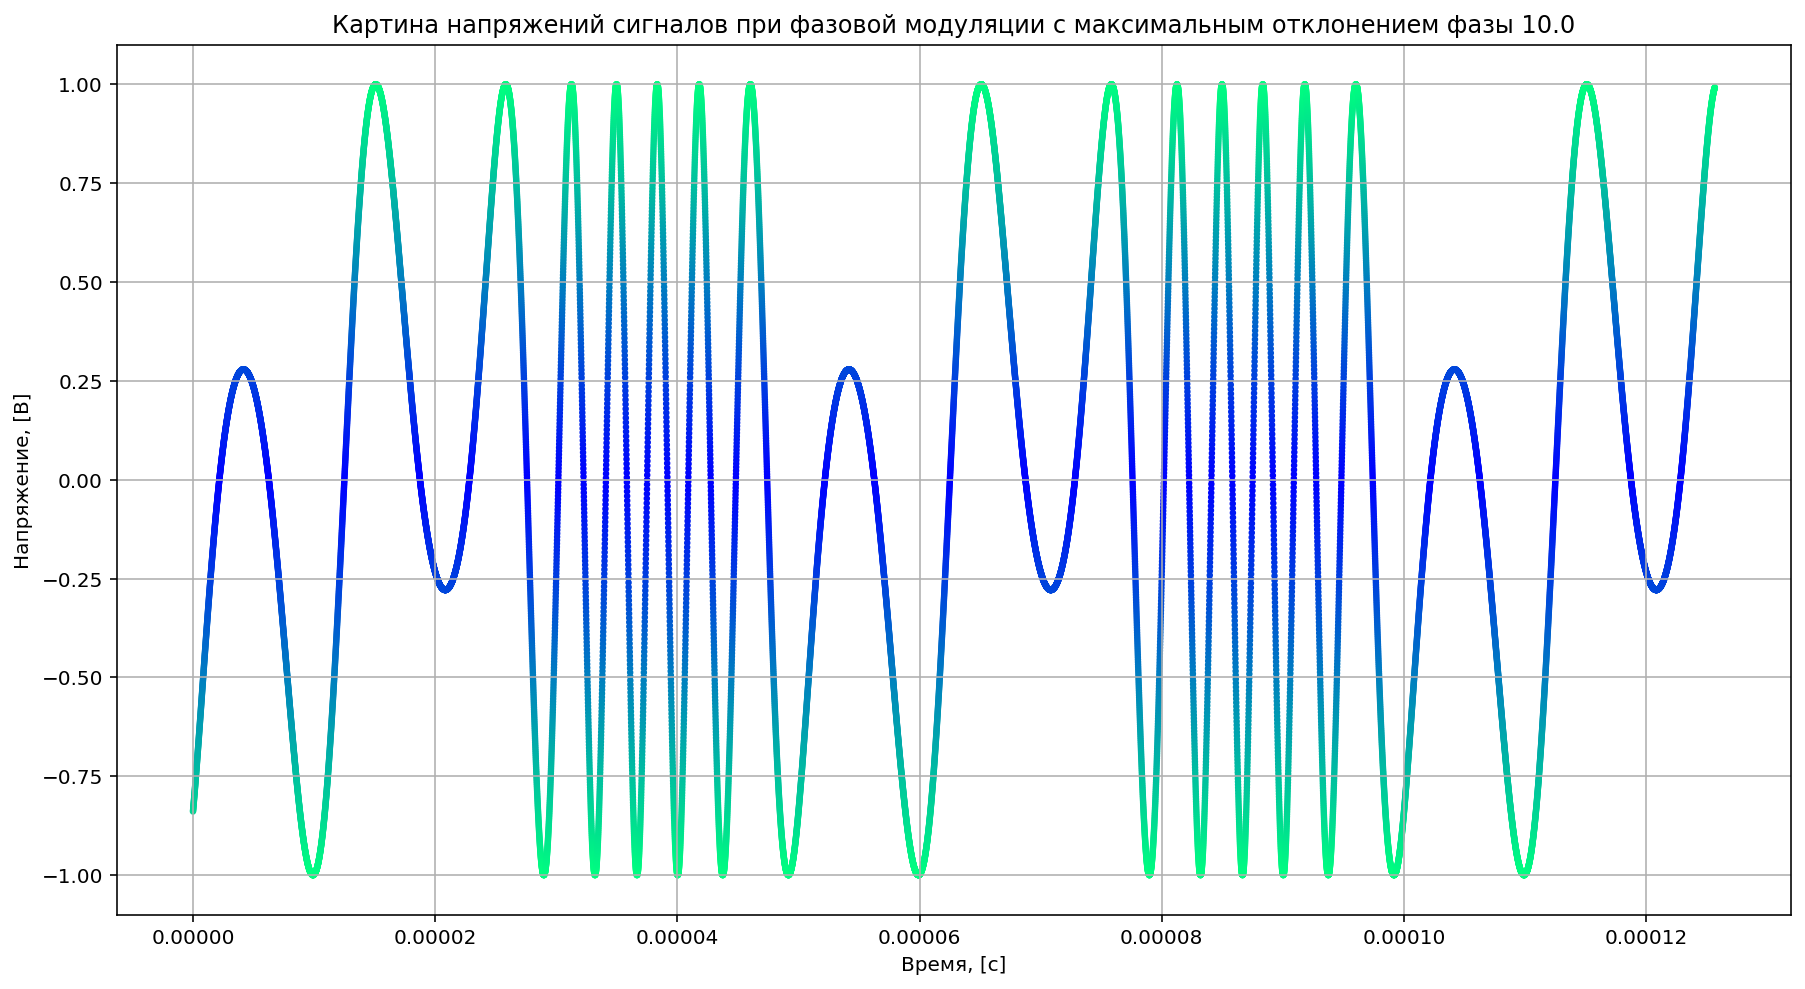

In [16]:
show_phasemodulated(t_max=2*T, dev=deviation_phase_coeff*100)

# **Фурье-преобразование**

In [27]:
from scipy.signal import find_peaks, blackman
from scipy.fftpack import rfft, irfft, rfftfreq
from scipy import misc
from random import uniform
import matplotlib.image as mpimg

In [18]:
# частотность точек за период в одну секунду
density = 500
# частота искомого сигнала
frequency = 2
# частота вредного сигнала с шумом
noise_frequency = 10 * frequency
# отрезок построения по времени
t_all = int(2 * 2 * np.pi / frequency)
# коэффициент вклада вредого сигнала
coeff = 0.1
# модуль максимального отклонения для белого шума
sigma = 0.1
# значение нормализации для int значения
int_normalization = 32767

In [19]:
def generate_signal(w, ro, time_window, low=0, high=0):
    x = np.linspace(0, time_window, ro * time_window, endpoint=0)
    return x, [np.sin(value * w) + uniform(low, high) for value in x]

Сгенерируем искомый сигнал и вредный с шумом:

In [20]:
x_signal, y_raw_signal = generate_signal(frequency, density, t_all)
_, y_dirty_signal = generate_signal(noise_frequency, density, t_all, low=-sigma, high=sigma)
assert len(y_raw_signal) == len(y_dirty_signal)
y_dirty_signal = [coeff * y_dirty_signal[i] + y_raw_signal[i] for i in range(len(y_raw_signal))]

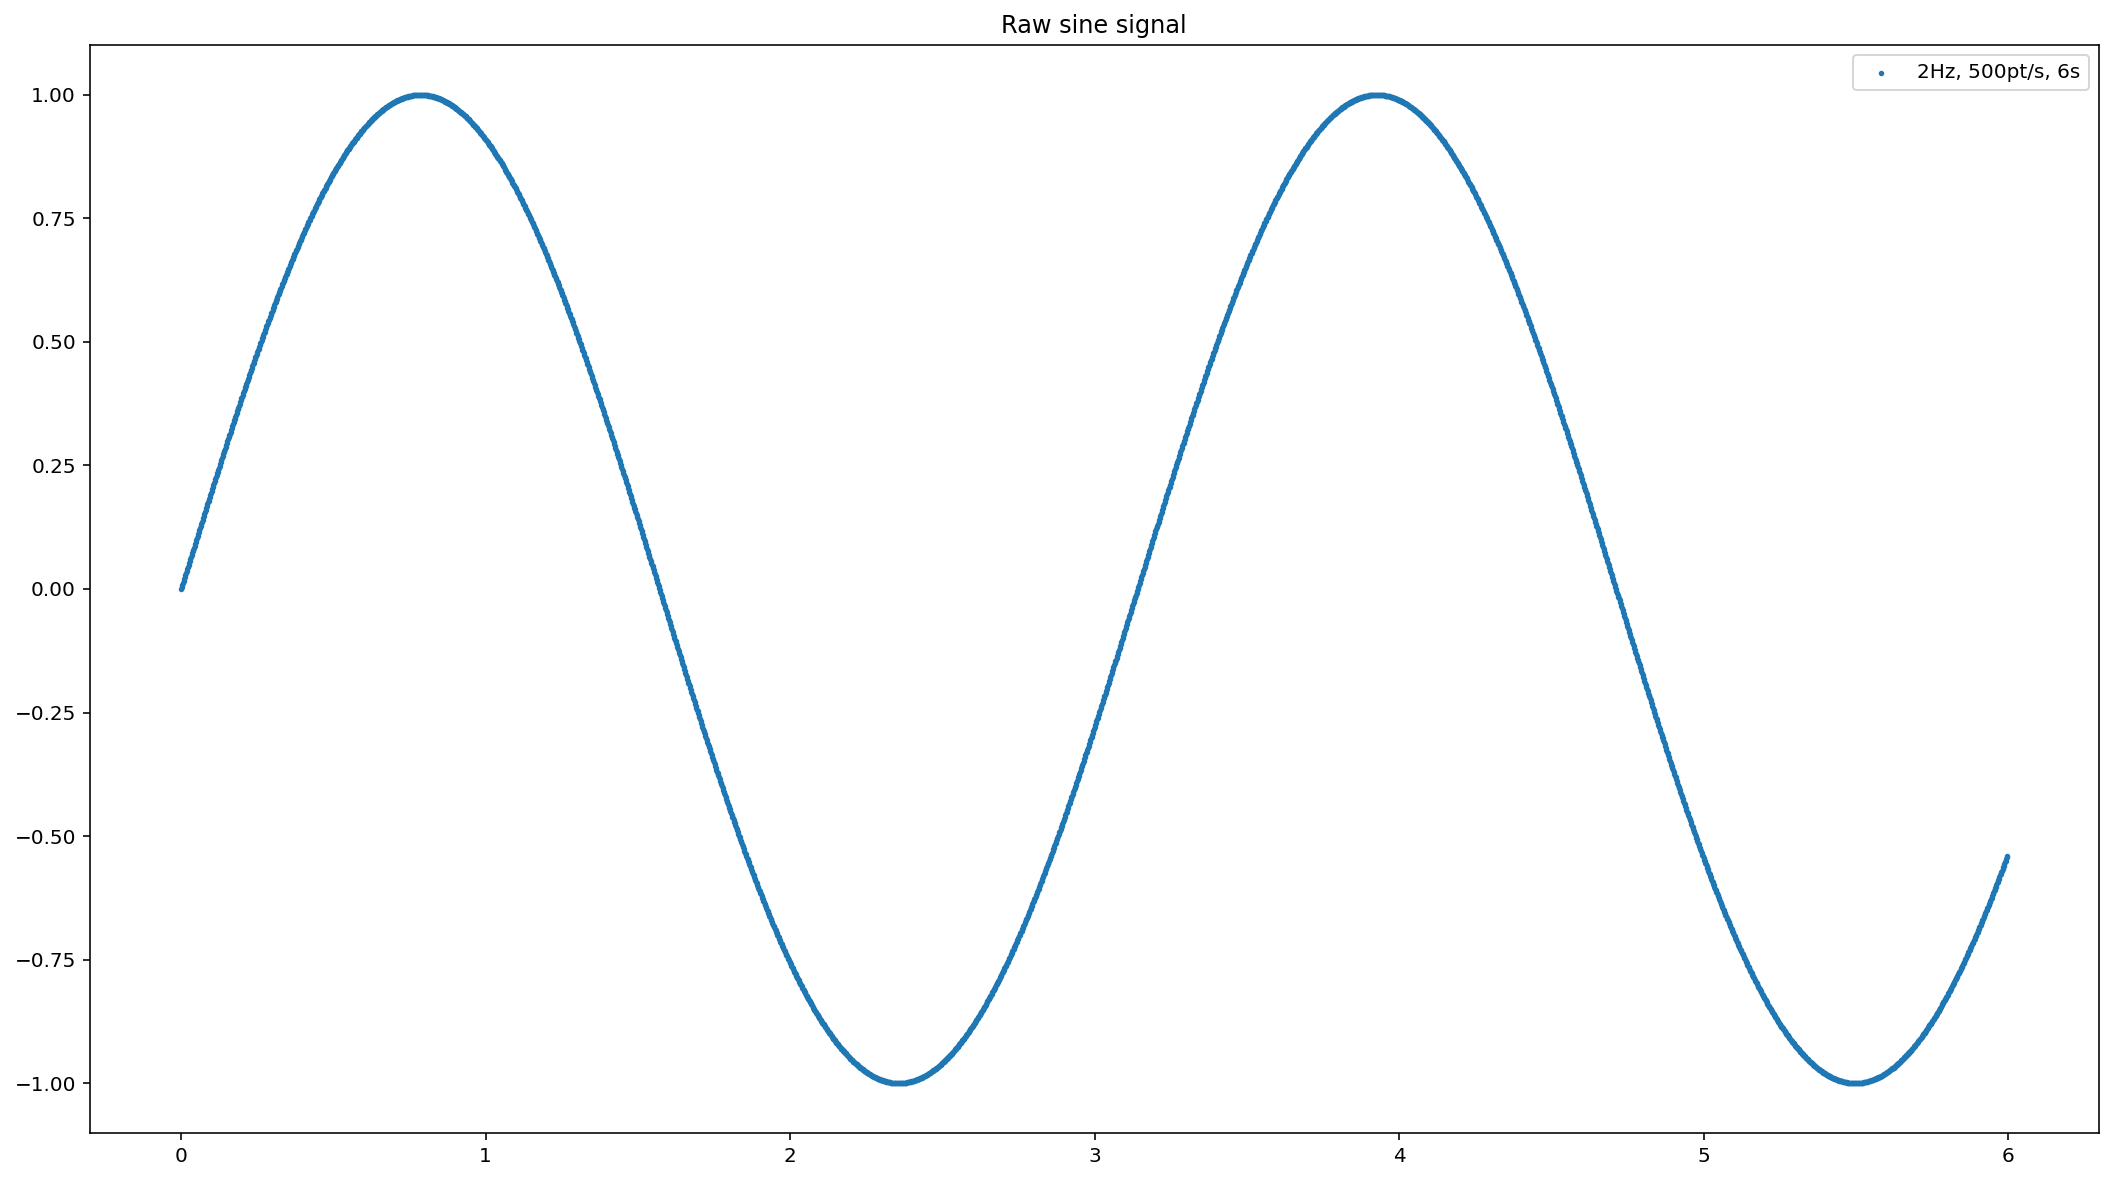

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.scatter(x=x_signal,
           y=y_raw_signal,
           label=f'{frequency}Hz, {density}pt/s, {t_all}s', s=3)
ax.legend()
ax.set(title='Raw sine signal')
plt.show()

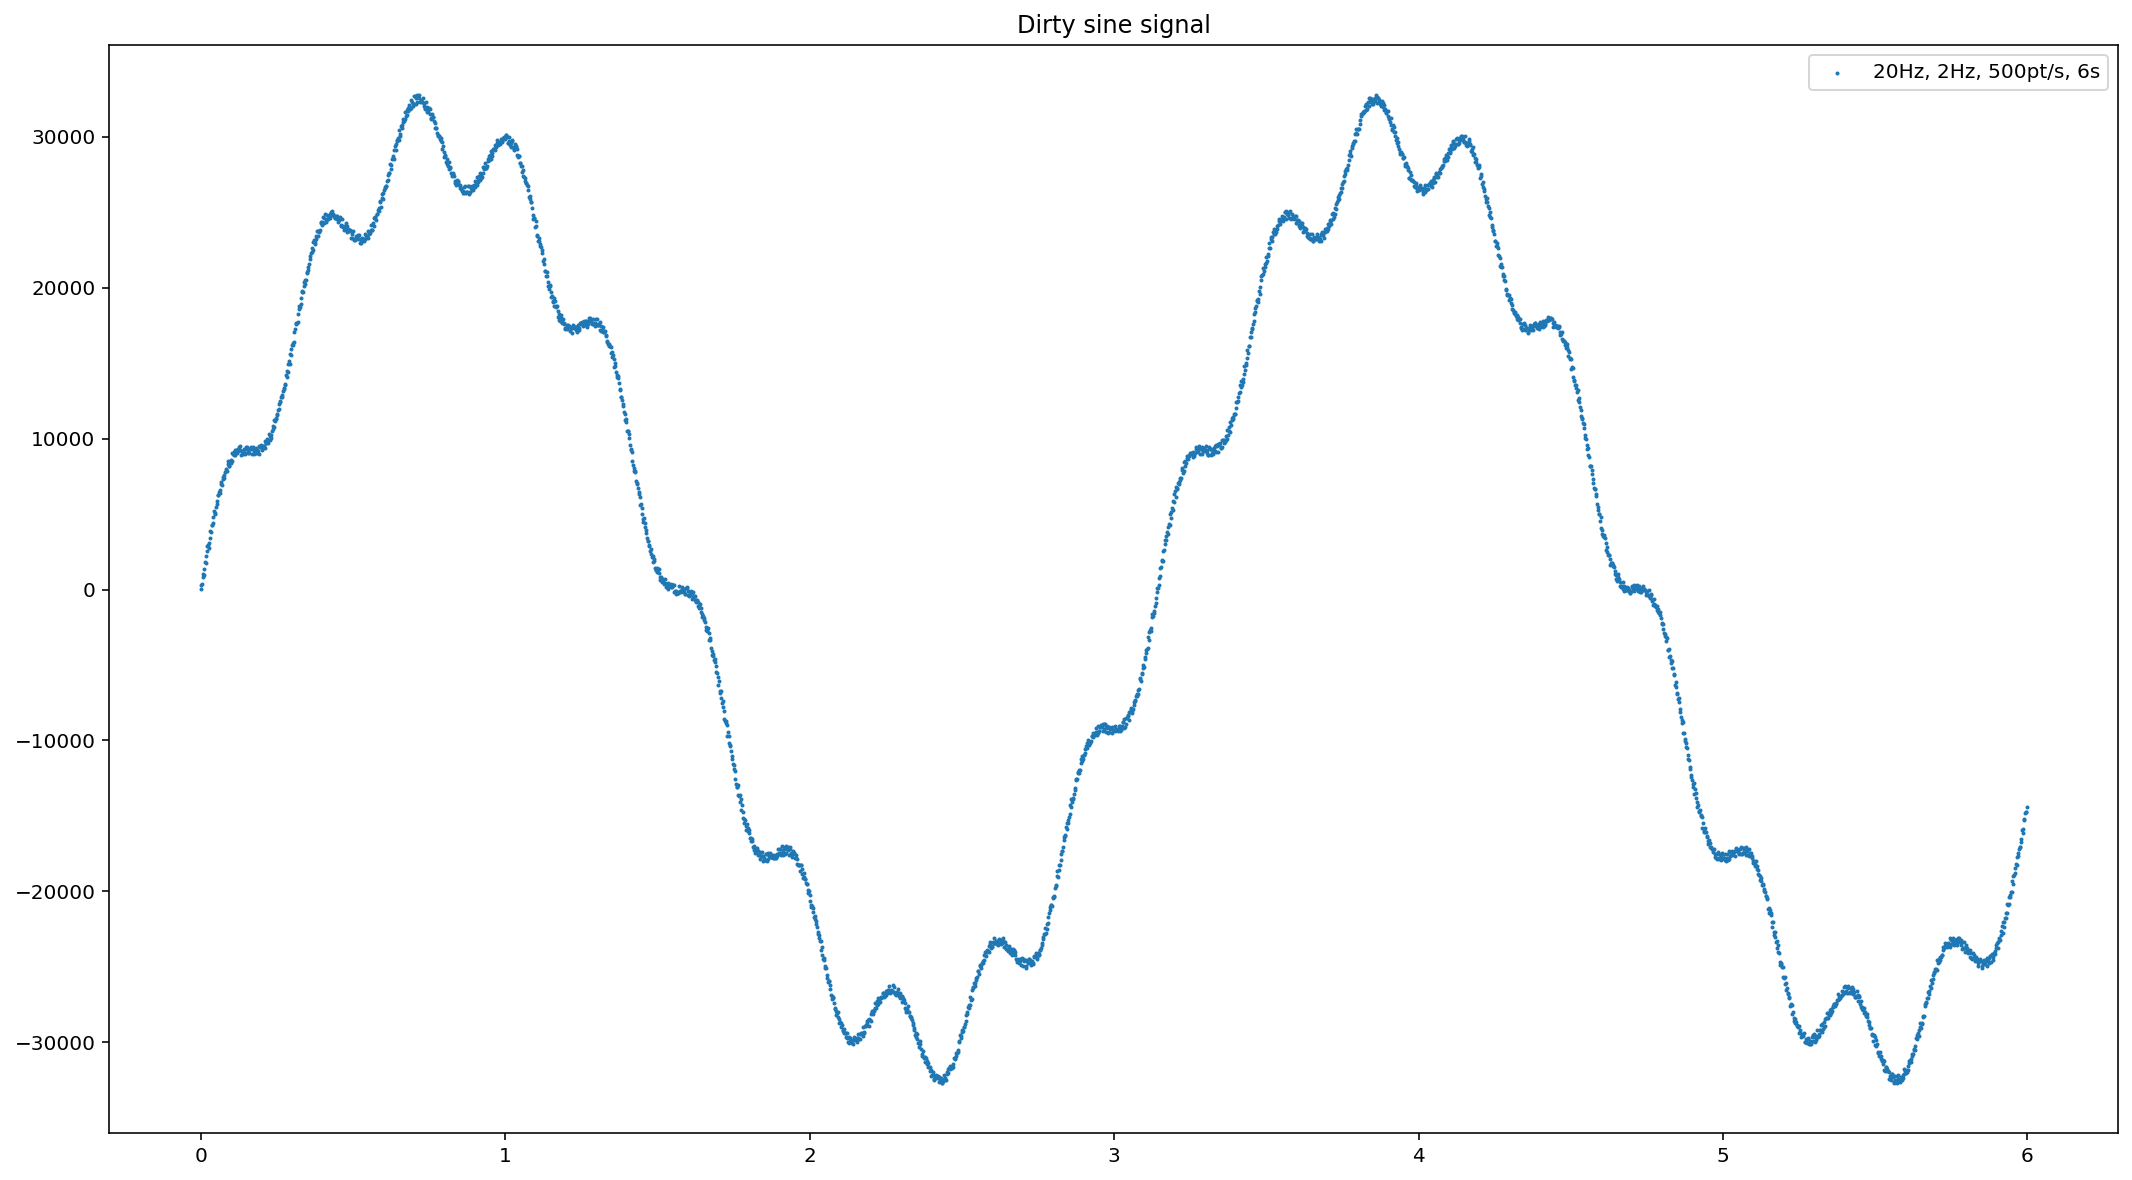

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
assert len(x_signal) == len(y_dirty_signal)
y_dirty_signal = [elem * int_normalization / max(y_dirty_signal) for elem in y_dirty_signal]
ax.scatter(x=x_signal,
           y=y_dirty_signal,
           label=f'{noise_frequency}Hz, {frequency}Hz, {density}pt/s, {t_all}s', s=1)
ax.legend()
ax.set(title='Dirty sine signal')
plt.show()

Отобразим спектр сигнала:

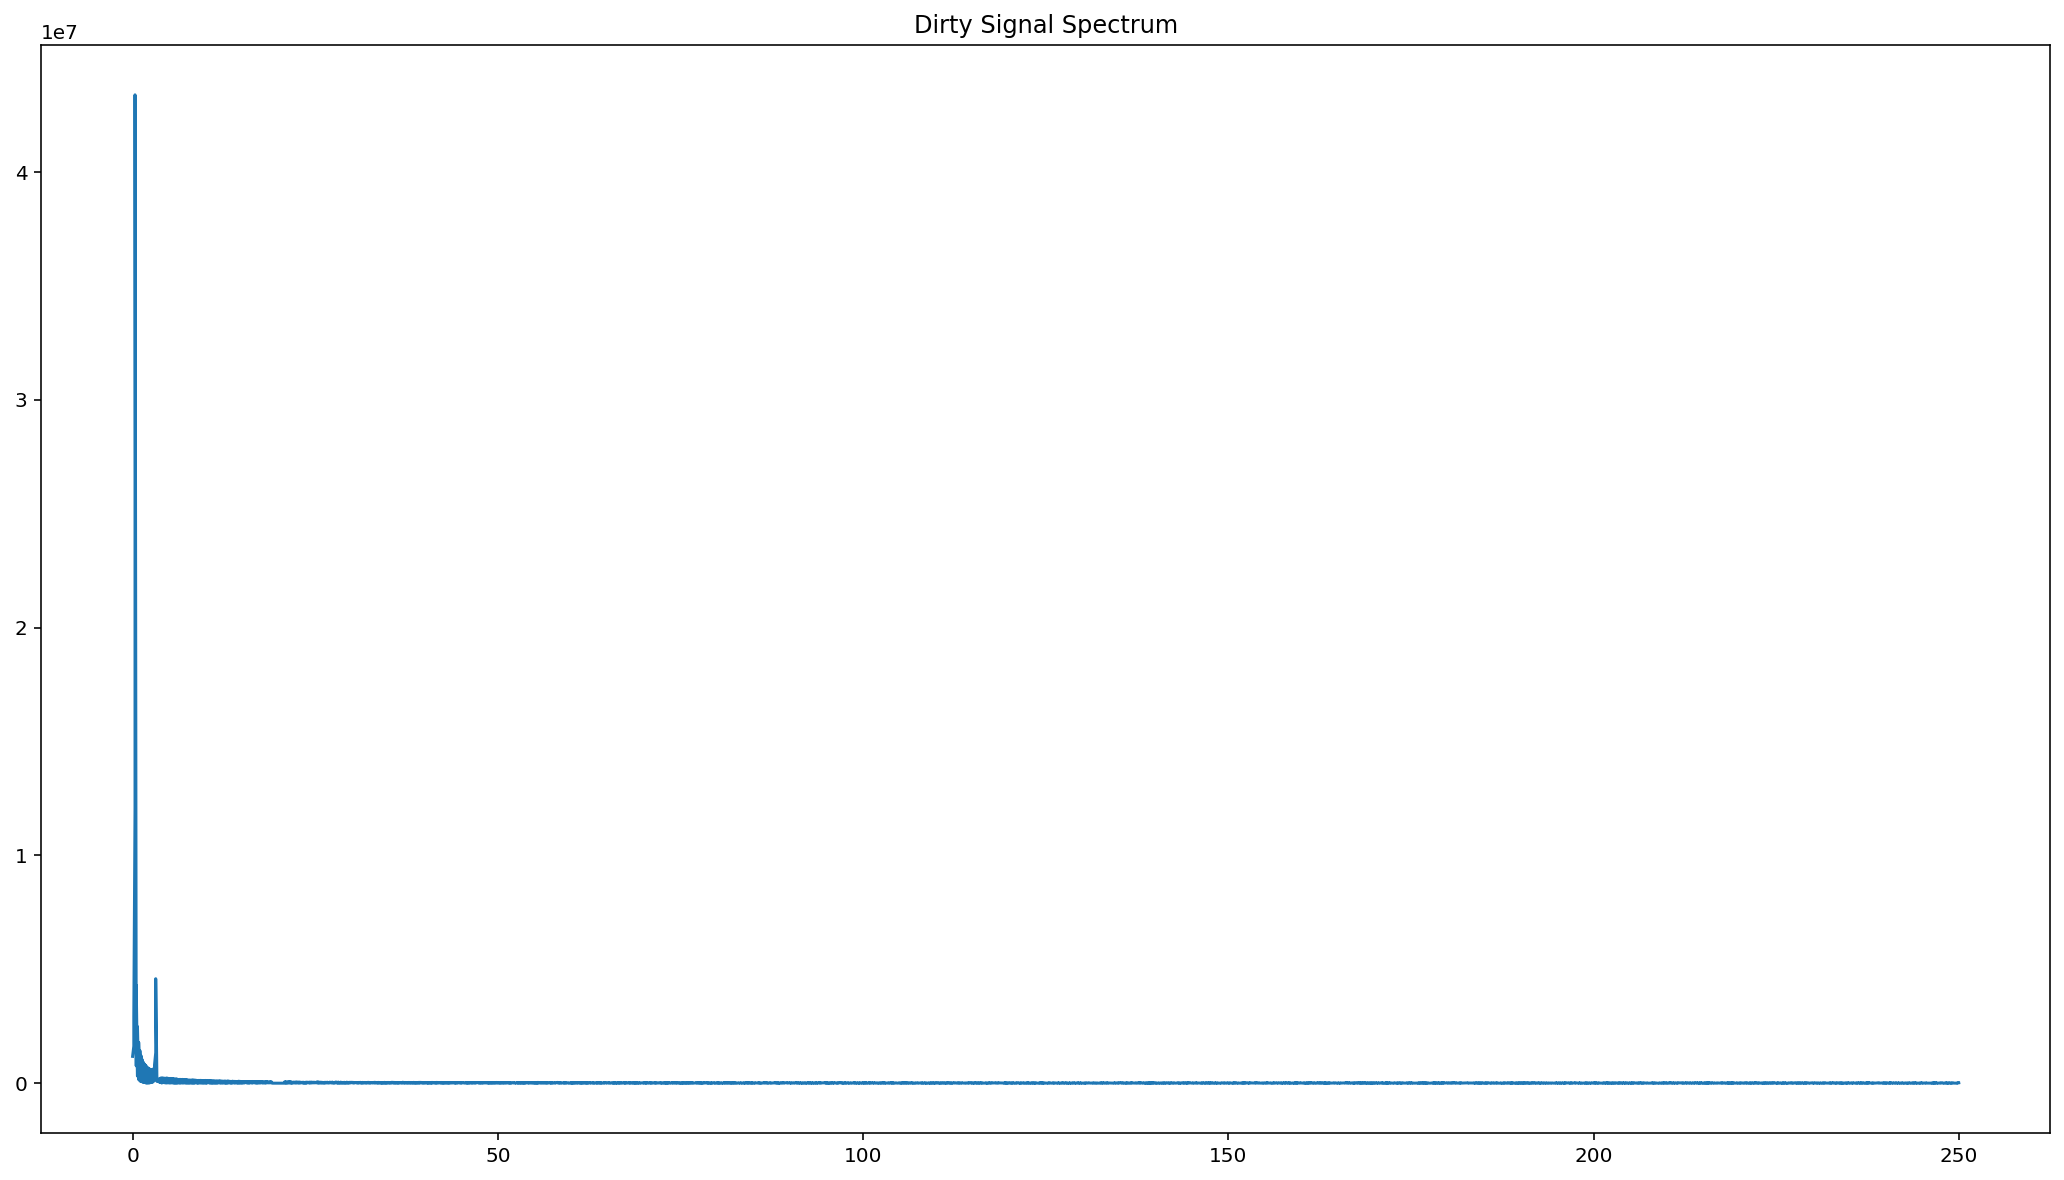

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
xfft = rfftfreq(density * t_all, 1 / density)
yfft = np.abs(rfft(y_dirty_signal))
id_null = int(noise_frequency * len(xfft) / (density / 2))
yfft[id_null - 10 : id_null + 10] = 0
yfft = [value if value > sigma else 0 for value in yfft]
plt.plot(xfft, yfft)
ax.set(title='Dirty Signal Spectrum')
plt.show()

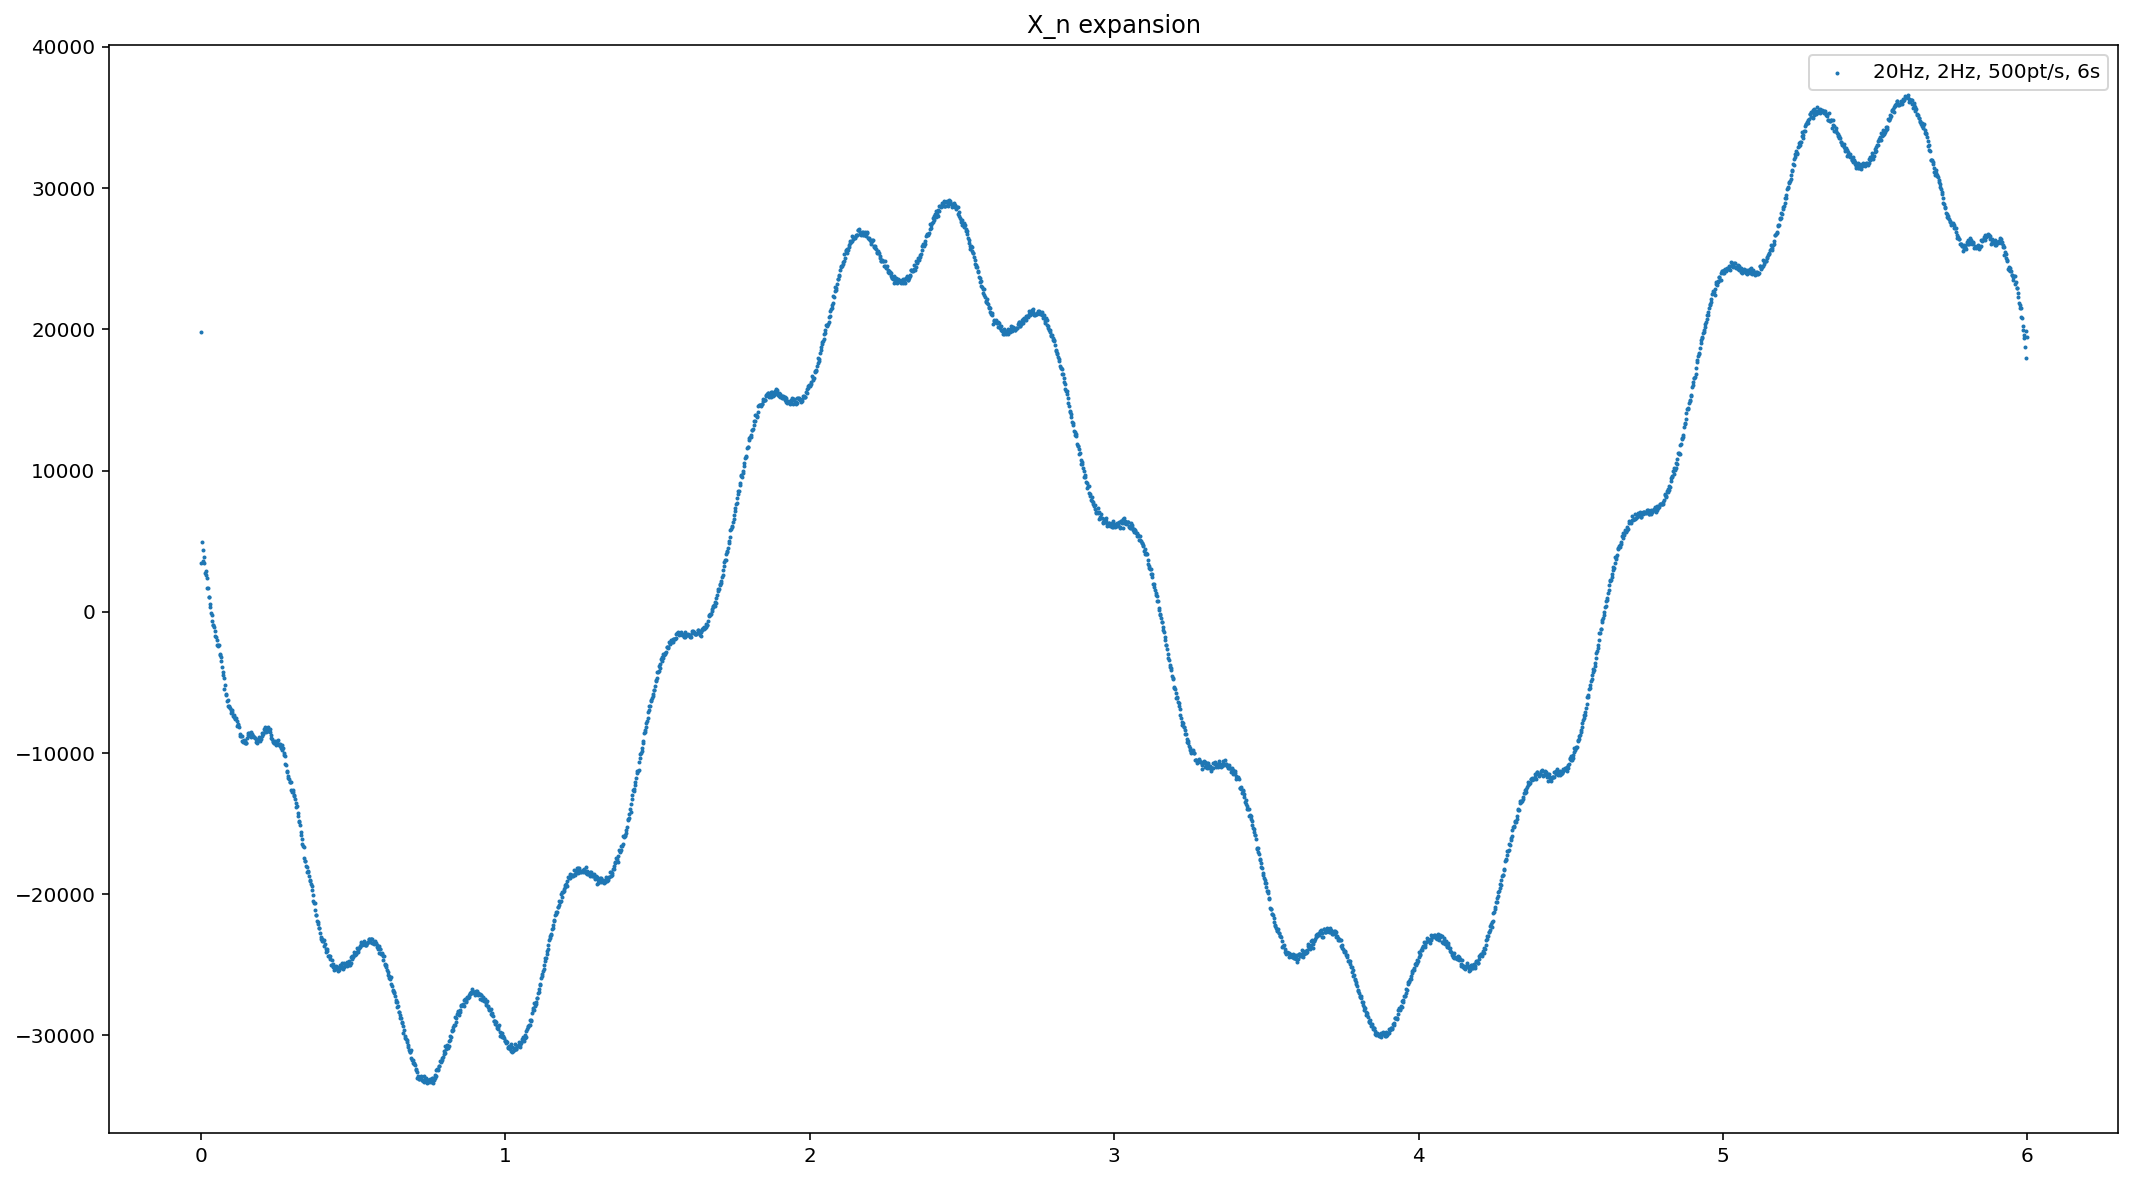

In [24]:
y_filtered = irfft(yfft)
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
assert len(x_signal) == len(y_filtered)
ax.scatter(x=x_signal,
           y=y_filtered,
           label=f'{noise_frequency}Hz, {frequency}Hz, {density}pt/s, {t_all}s', s=1)
ax.legend()
ax.set(title='X_n expansion')
plt.show()

Отфильтруем по основной моде:

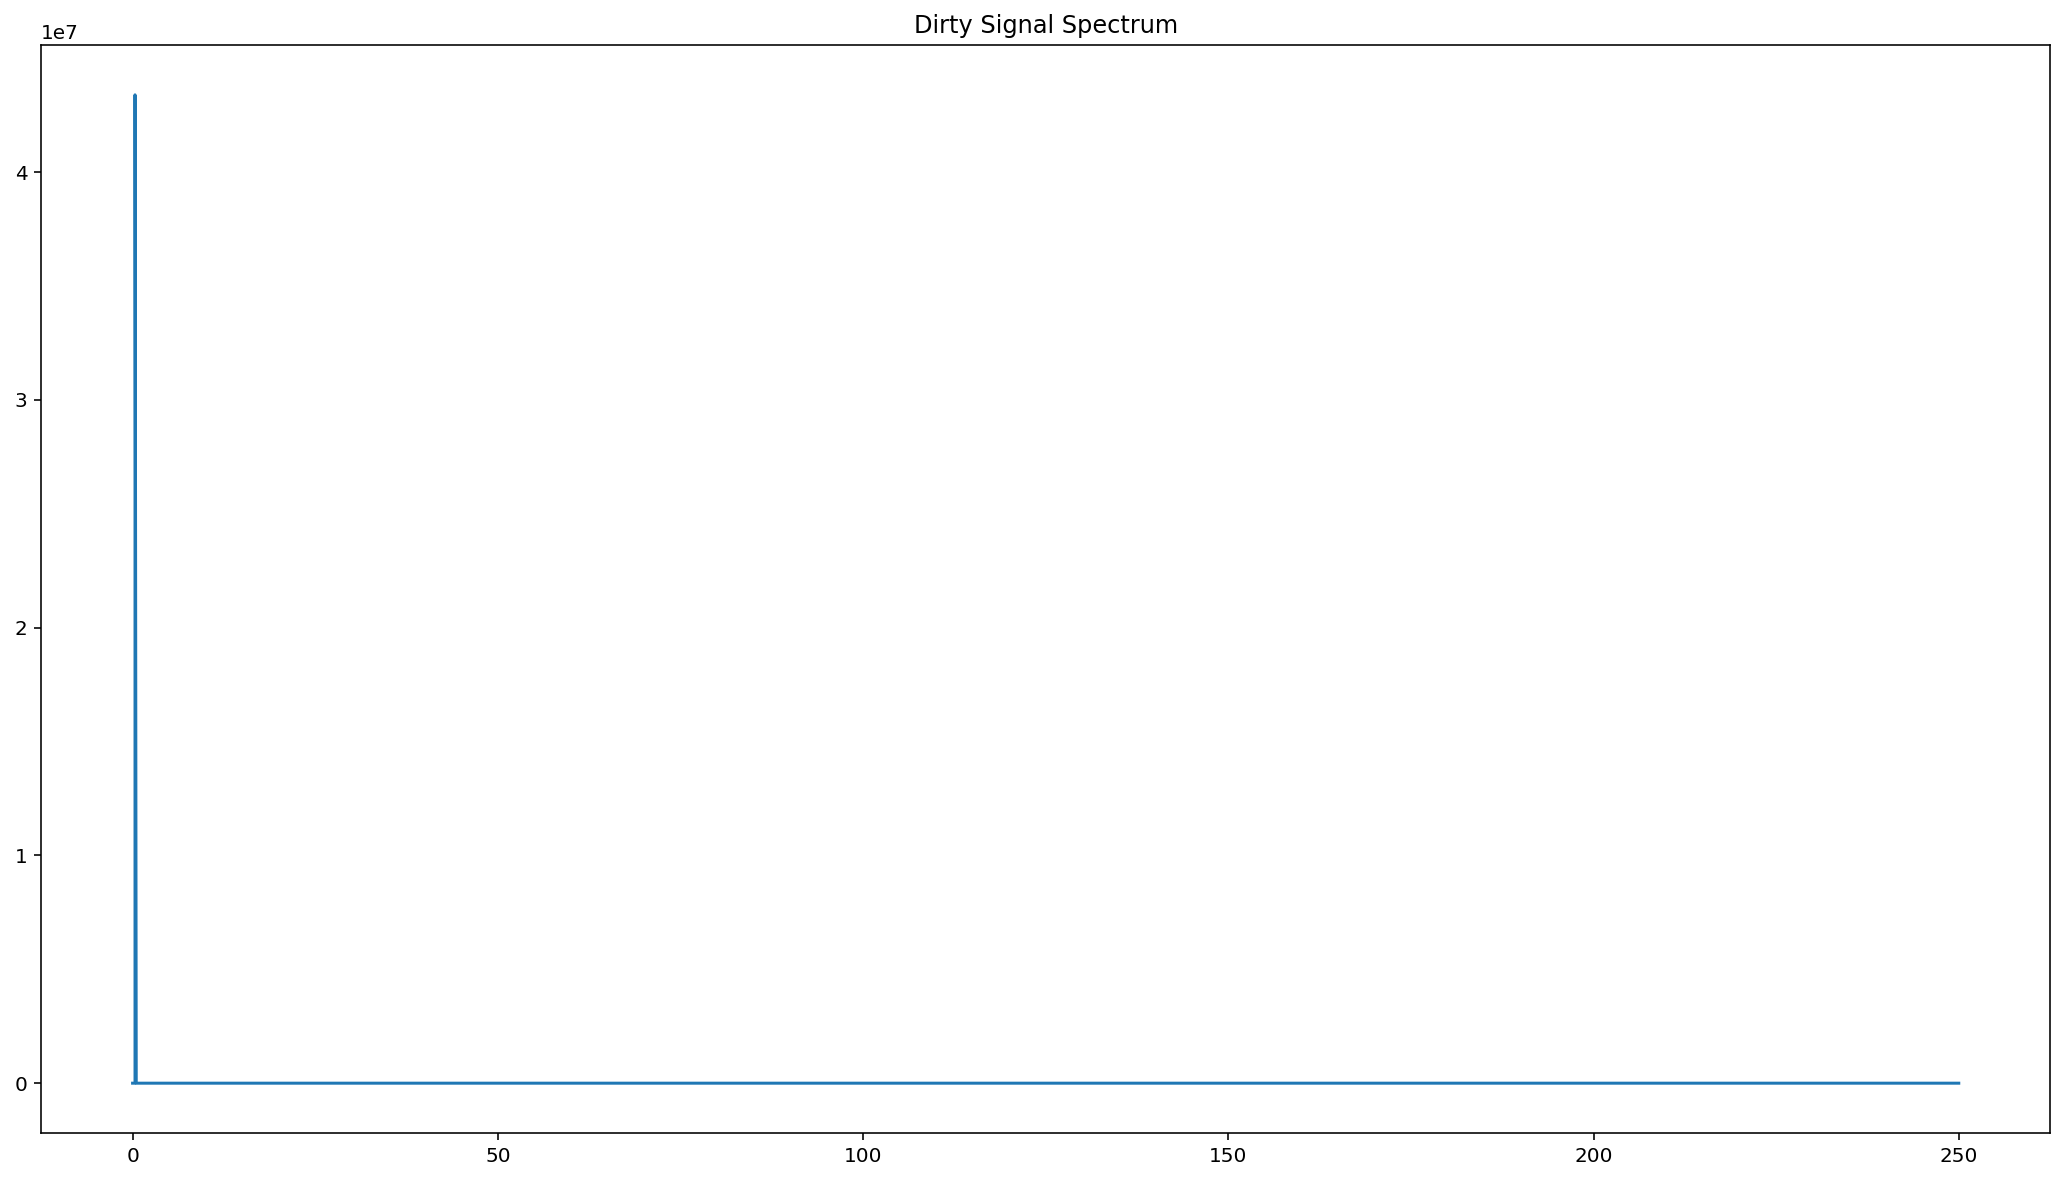

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
yfft = [value if value == max(yfft) else 0 for value in yfft]
plt.plot(xfft, yfft)
ax.set(title='Dirty Signal Spectrum')
plt.show()

И сравним искомый и отфильтрованный сигналы:

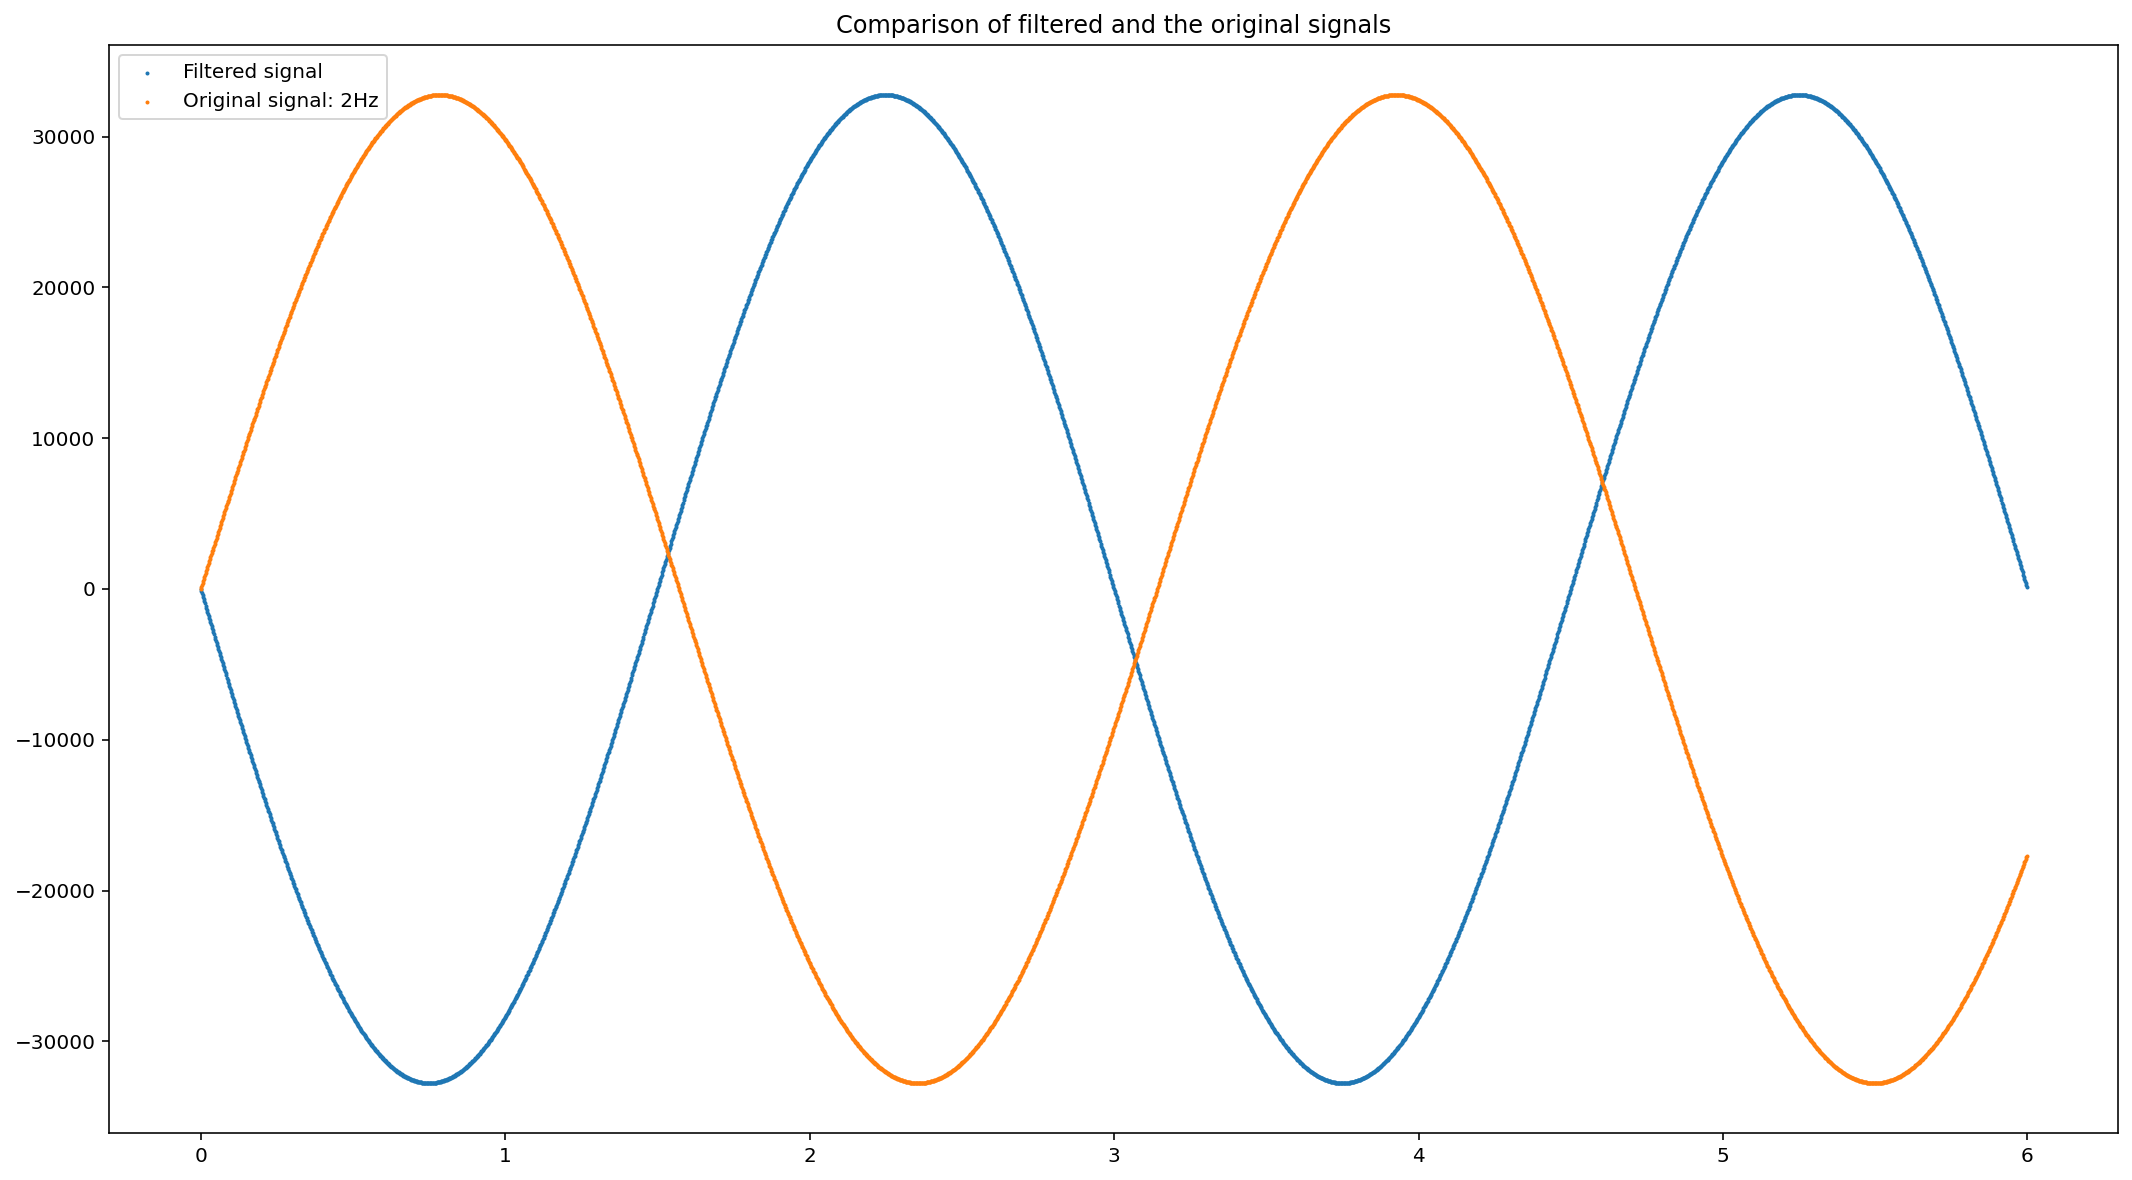

In [26]:
y_filtered = irfft(yfft)
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
assert len(x_signal) == len(y_filtered)

y_filtered = [value * int_normalization / max(y_filtered) for value in y_filtered]
ax.scatter(x=x_signal,
           y=y_filtered,
           label=f'Filtered signal', s=1)

y_raw_signal = [value * int_normalization / max(y_raw_signal) for value in y_raw_signal]
ax.scatter(x=x_signal,
           y=y_raw_signal,
           label=f'Original signal: {frequency}Hz', s=1)
ax.legend()
ax.set(title='Comparison of filtered and the original signals')
plt.show()

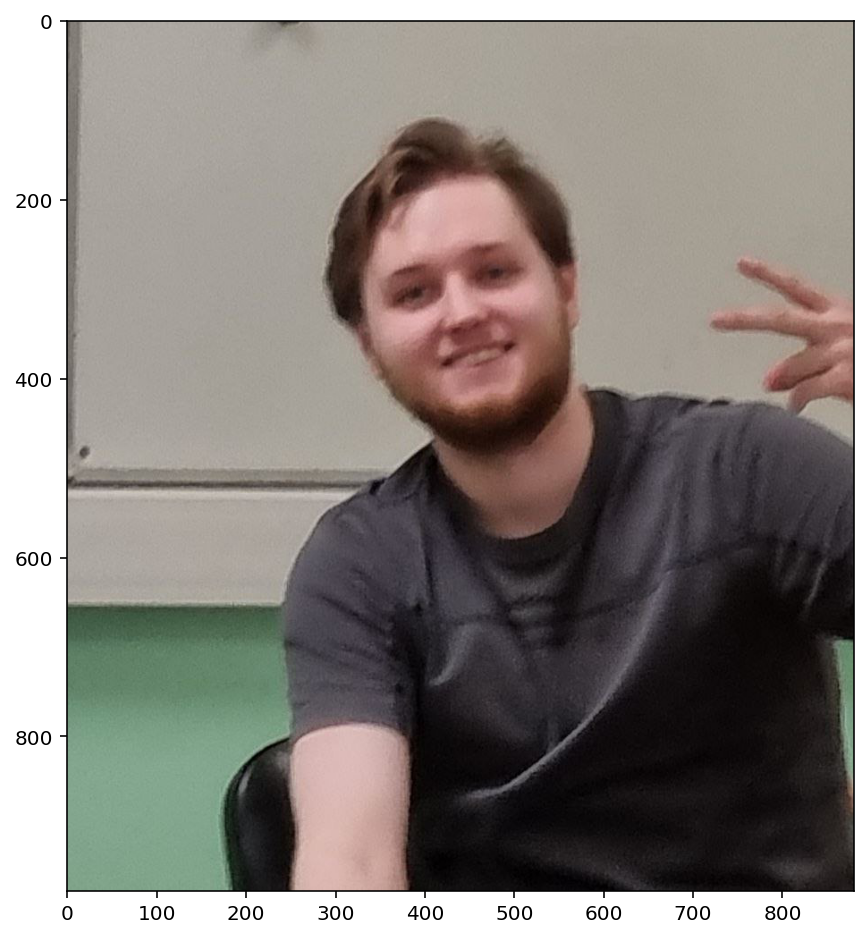

In [33]:
image = mpimg.imread('/content/man.jpg')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
imgplot = plt.imshow(image)